In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

%matplotlib inline
warnings.filterwarnings('ignore')


In [6]:
bengaluru_df = pd.read_csv(r'/Users/omchandrakantdeo/TSPFC/Case Study/read_csv/bengaluru_combined.csv')
chennai_df = pd.read_csv(r'//Users/omchandrakantdeo/TSPFC/Case Study/read_csv/chennai_combined.csv')
delhi_df = pd.read_csv(r'/Users/omchandrakantdeo/TSPFC/Case Study/read_csv/delhi_combined.csv')
hyderabad_df = pd.read_csv(r'/Users/omchandrakantdeo/TSPFC/Case Study/read_csv/hyderabad_combined.csv')
kolkata_df = pd.read_csv(r'/Users/omchandrakantdeo/TSPFC/Case Study/read_csv/kolkata_combined.csv')
mumbai_df = pd.read_csv(r'/Users/omchandrakantdeo/TSPFC/Case Study/read_csv/mumbai_combined.csv')
gwalior_df = pd.read_csv(r'/Users/omchandrakantdeo/TSPFC/Case Study/read_csv/gwalior_combined.csv')
jaipur_df = pd.read_csv(r'/Users/omchandrakantdeo/TSPFC/Case Study/read_csv/jaipur_combined.csv')
lucknow_df = pd.read_csv(r'/Users/omchandrakantdeo/TSPFC/Case Study/read_csv/lucknow_combined.csv')
visakhapatnam_df = pd.read_csv(r'/Users/omchandrakantdeo/TSPFC/Case Study/read_csv/visakhapatnam_combined.csv')

In [7]:
bengaluru_df

Timestamp                Location  PM2.5    PM10    NO2    NH3    SO2  \
0     01-01-2020  Bengaluru - Silk Board    NaN     NaN    NaN    NaN    NaN   
1     02-01-2020  Bengaluru - Silk Board  43.67  134.00  20.28  10.98   3.41   
2     03-01-2020  Bengaluru - Silk Board  30.58   74.42  15.17  12.10   3.27   
3     04-01-2020  Bengaluru - Silk Board  66.35  155.68  42.90  11.75   3.26   
4     05-01-2020  Bengaluru - Silk Board  48.00   99.13  18.56   9.79   2.95   
...          ...                     ...    ...     ...    ...    ...    ...   
1822  27-12-2024  Bengaluru - Silk Board  16.87   36.64  14.38   1.90   7.28   
1823  28-12-2024  Bengaluru - Silk Board  26.02   68.69  14.46   1.83   8.47   
1824  29-12-2024  Bengaluru - Silk Board  28.00   65.62  14.14   1.71   8.23   
1825  30-12-2024  Bengaluru - Silk Board  18.96   68.04  14.38   1.77   7.49   
1826  31-12-2024  Bengaluru - Silk Board  25.77   59.84  15.14   1.86  10.15   

        CO     O3  
0      NaN    NaN  
1     0.91  21.82  
2     0.96  23.31  
3     2.54  29.70  
4     1.14  31.01  
...    ...    ...  
1822  0.47  19.78  
1823  0.44  21.35  
1824  0.21  21.59  
1825  0.50  21.23  
1826  0.54  20.86  

[1827 rows x 9 columns]

In [11]:
def extract_datetime_features(df):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y')
    df['Year'] = pd.to_datetime(df['Timestamp']).dt.year
    df['Month'] = pd.to_datetime(df['Timestamp']).dt.month
    df['Day'] = pd.to_datetime(df['Timestamp']).dt.day
    df["Weekday"] = df["Timestamp"].dt.weekday
    df["Weekend"] = df["Weekday"].apply(lambda x: 1 if x >= 5 else 0)

In [12]:
extract_datetime_features(bengaluru_df)

In [13]:
extract_datetime_features(chennai_df)

In [14]:
extract_datetime_features(delhi_df)

In [15]:
extract_datetime_features(hyderabad_df)

In [16]:
extract_datetime_features(kolkata_df)

In [17]:
extract_datetime_features(mumbai_df)

In [18]:
extract_datetime_features(gwalior_df)

In [19]:
extract_datetime_features(jaipur_df)

In [20]:
extract_datetime_features(lucknow_df)


In [21]:
extract_datetime_features(visakhapatnam_df)

In [22]:
visakhapatnam_df

Timestamp                         Location  PM2.5    PM10    NO2    NH3  \
0    2020-01-01  Visakhapatnam - GVM Corporation  64.72  101.79  26.59  11.42   
1    2020-01-02  Visakhapatnam - GVM Corporation  50.87   91.55  30.49  11.40   
2    2020-01-03  Visakhapatnam - GVM Corporation  52.59   90.53  23.28  11.74   
3    2020-01-04  Visakhapatnam - GVM Corporation  21.82   48.86  21.84  10.36   
4    2020-01-05  Visakhapatnam - GVM Corporation  16.00   43.07  18.27  10.24   
...         ...                              ...    ...     ...    ...    ...   
1822 2024-12-27  Visakhapatnam - GVM Corporation  71.42  110.04  37.20  11.92   
1823 2024-12-28  Visakhapatnam - GVM Corporation  56.93   96.62  52.17   8.70   
1824 2024-12-29  Visakhapatnam - GVM Corporation  83.30  151.04  63.81  13.09   
1825 2024-12-30  Visakhapatnam - GVM Corporation  72.32  172.11  66.13  12.90   
1826 2024-12-31  Visakhapatnam - GVM Corporation  85.62  174.45  53.61  21.18   

       SO2    CO     O3  Year  Month  Day  Weekday  Weekend  
0     8.10  1.14  70.51  2020      1    1        2        0  
1     8.83  1.09  59.92  2020      1    2        3        0  
2     7.55  1.08  61.80  2020      1    3        4        0  
3     9.36  0.95  44.17  2020      1    4        5        1  
4     9.04  0.84  52.64  2020      1    5        6        1  
...    ...   ...    ...   ...    ...  ...      ...      ...  
1822  8.04  0.52  14.81  2024     12   27        4        0  
1823  7.04  0.63  10.82  2024     12   28        5        1  
1824  6.63  0.64   8.08  2024     12   29        6        1  
1825  7.01  0.81   8.20  2024     12   30        0        0  
1826  7.45  0.89  10.58  2024     12   31        1        0  

[1827 rows x 14 columns]

In [23]:
parameters = delhi_df.columns.tolist()[2:9]
parameters

['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'O3']

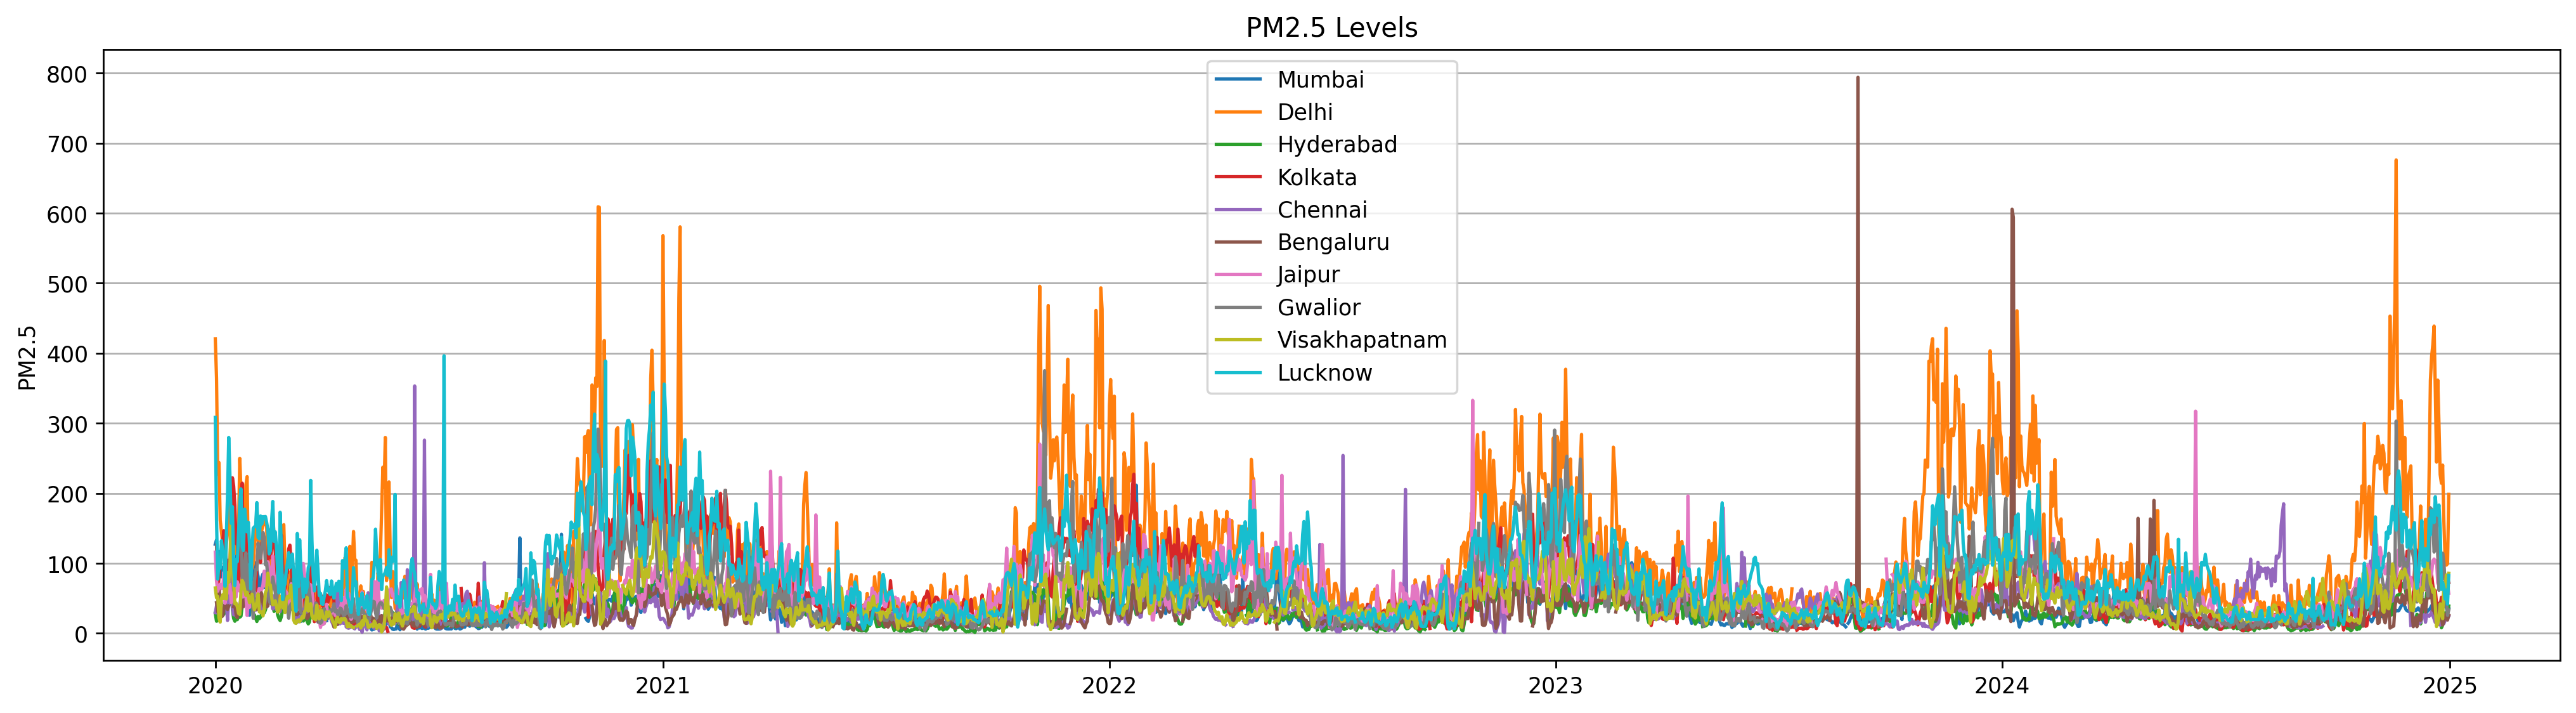

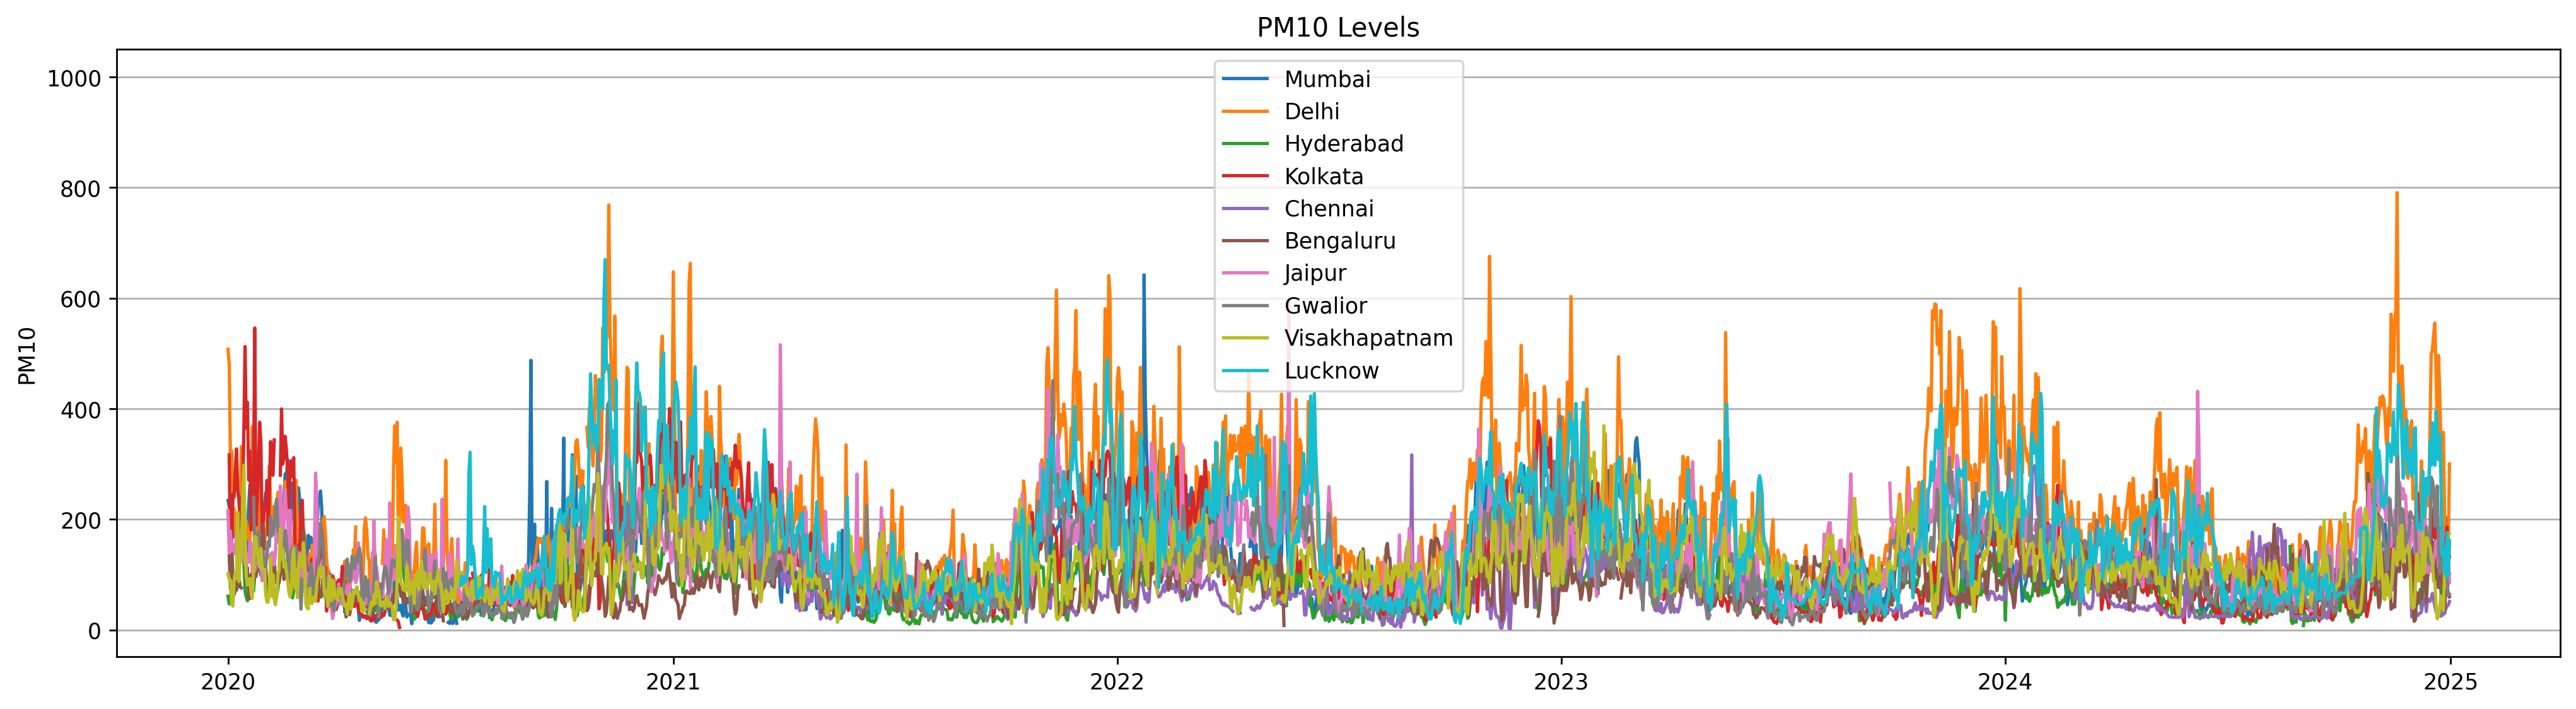

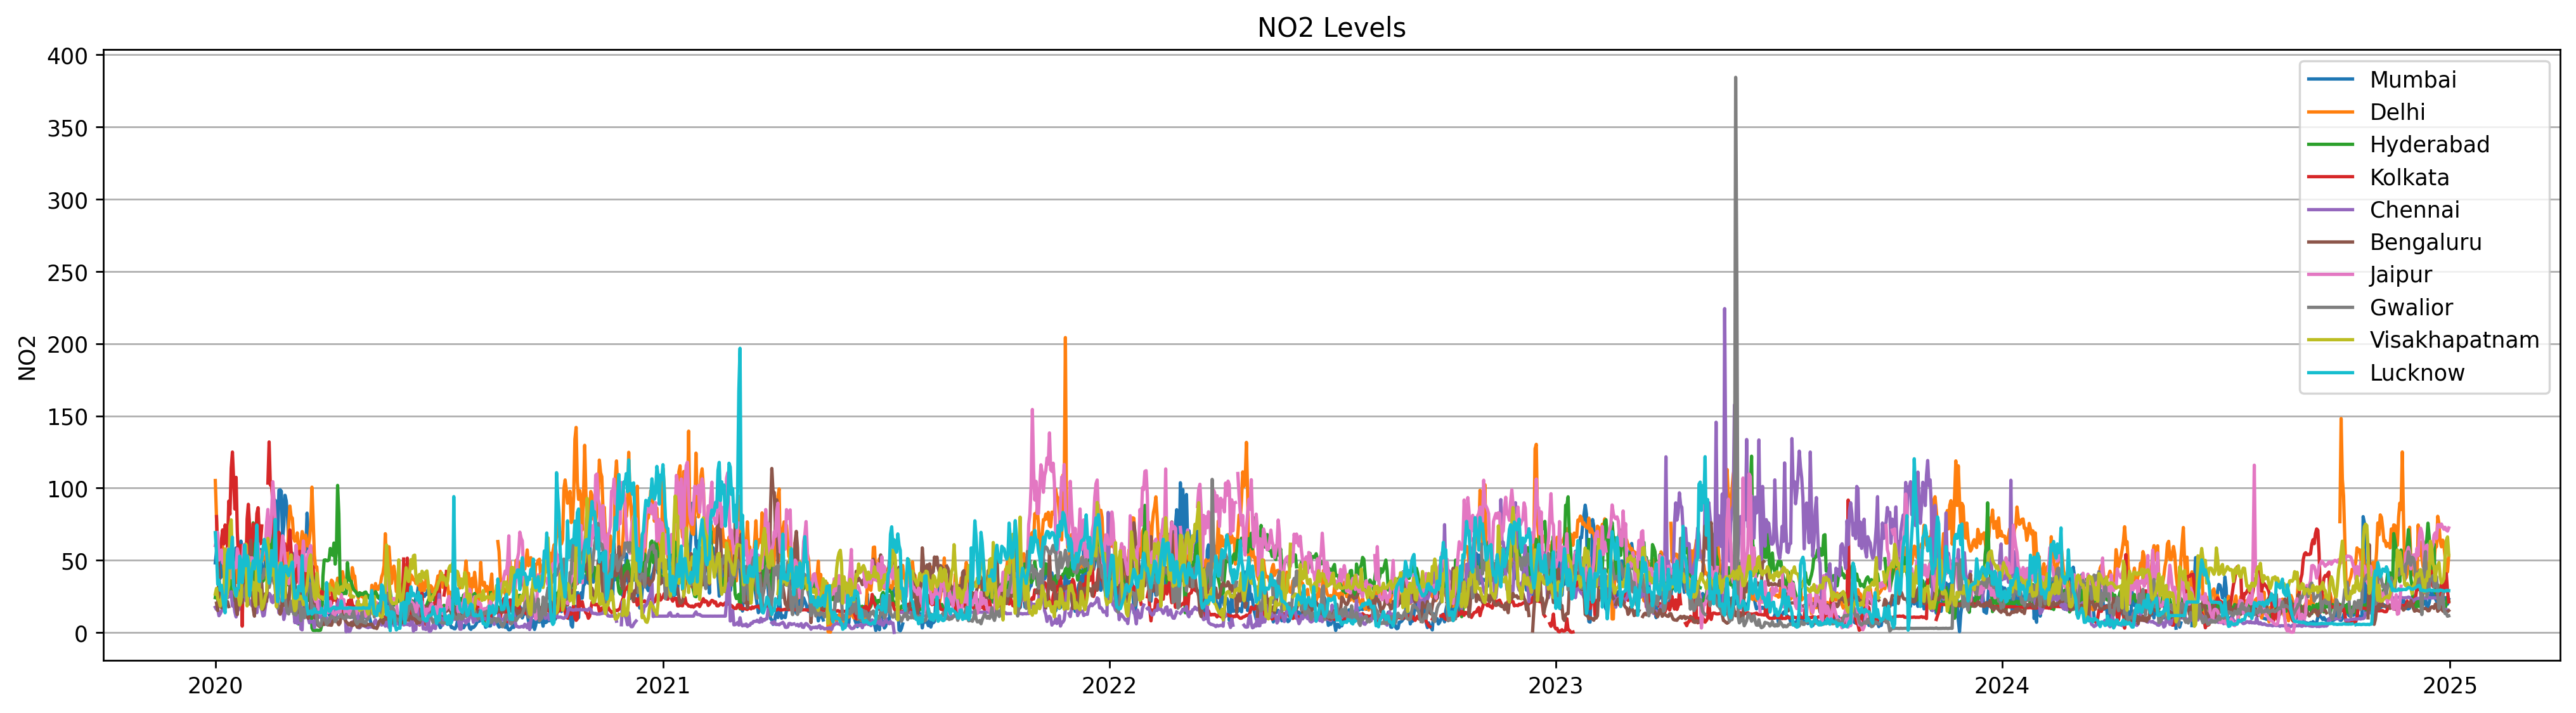

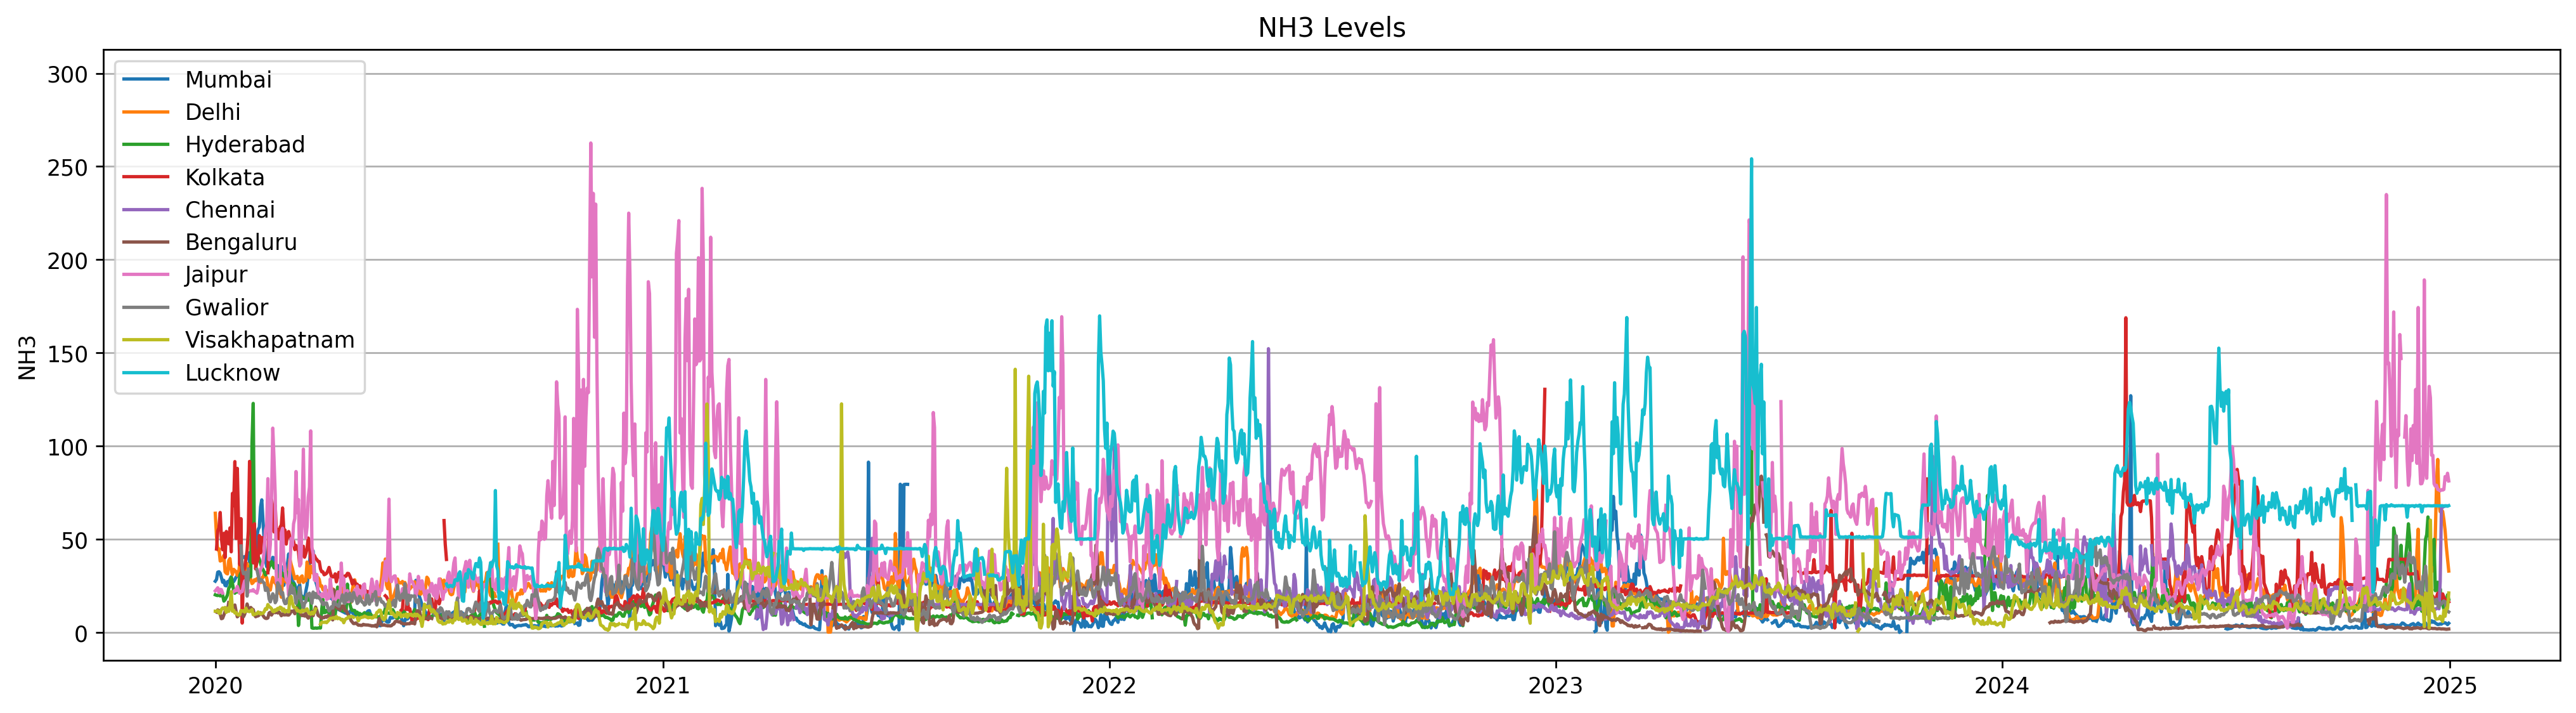

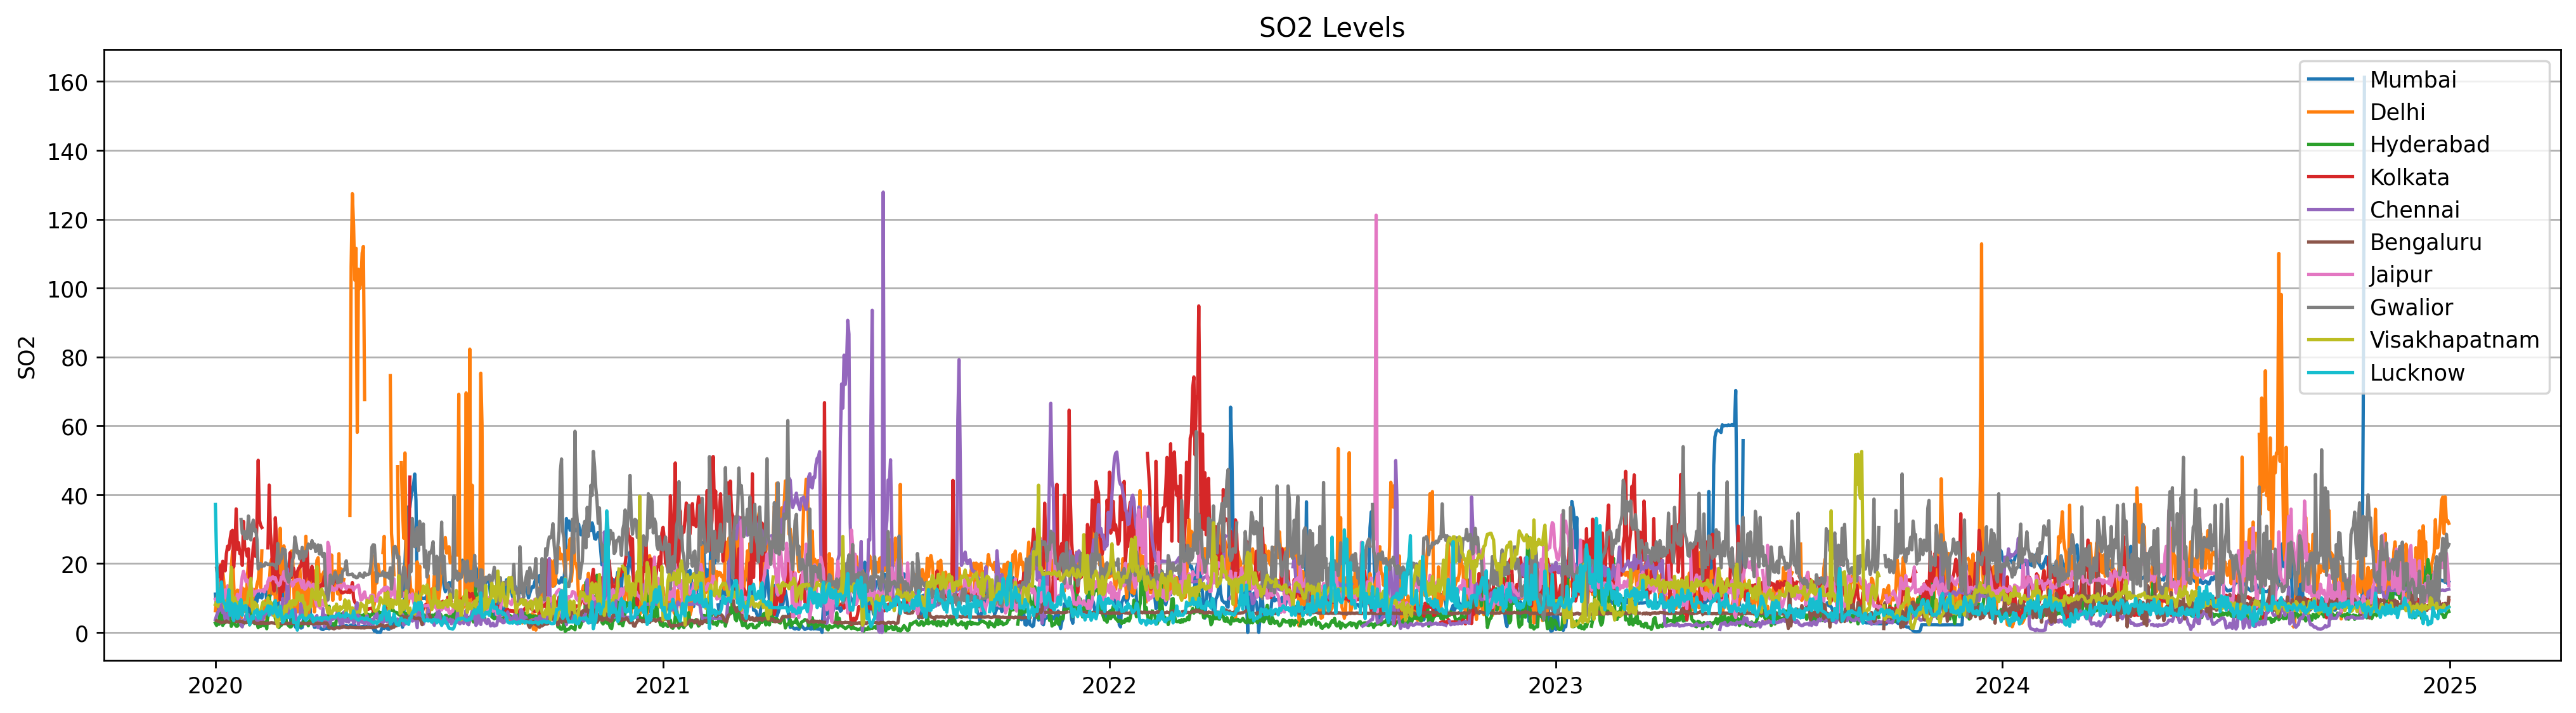

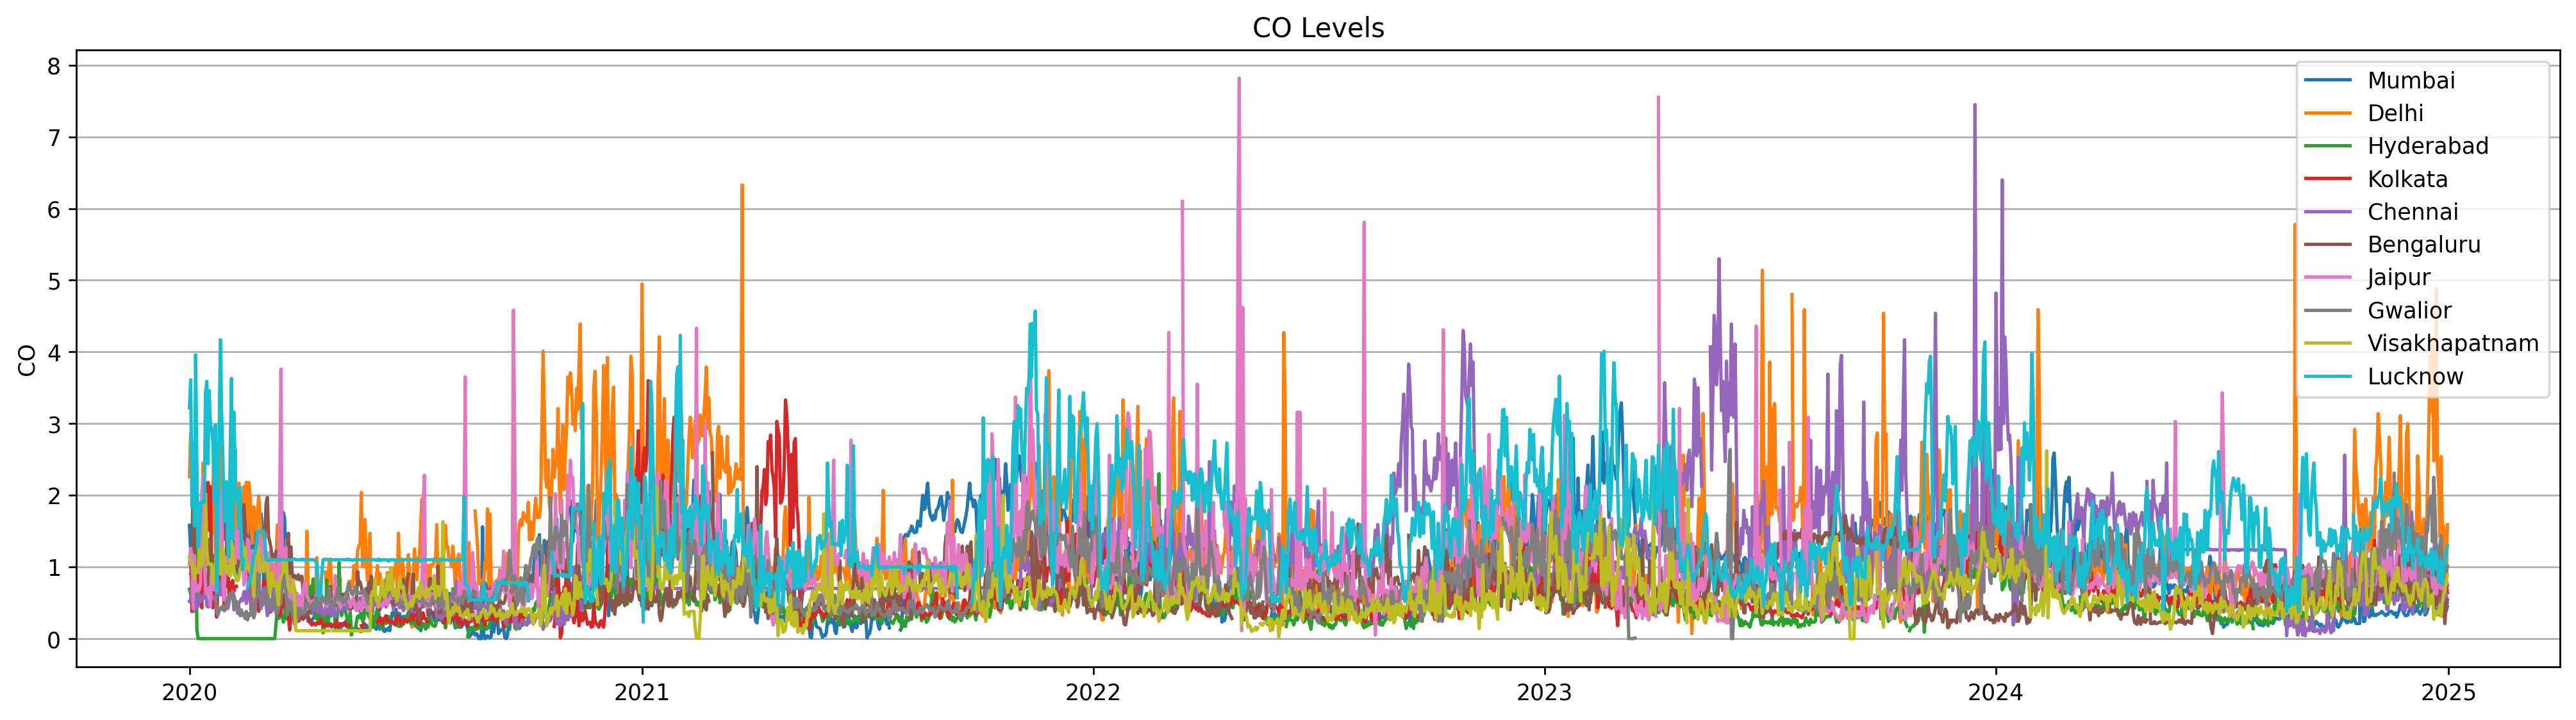

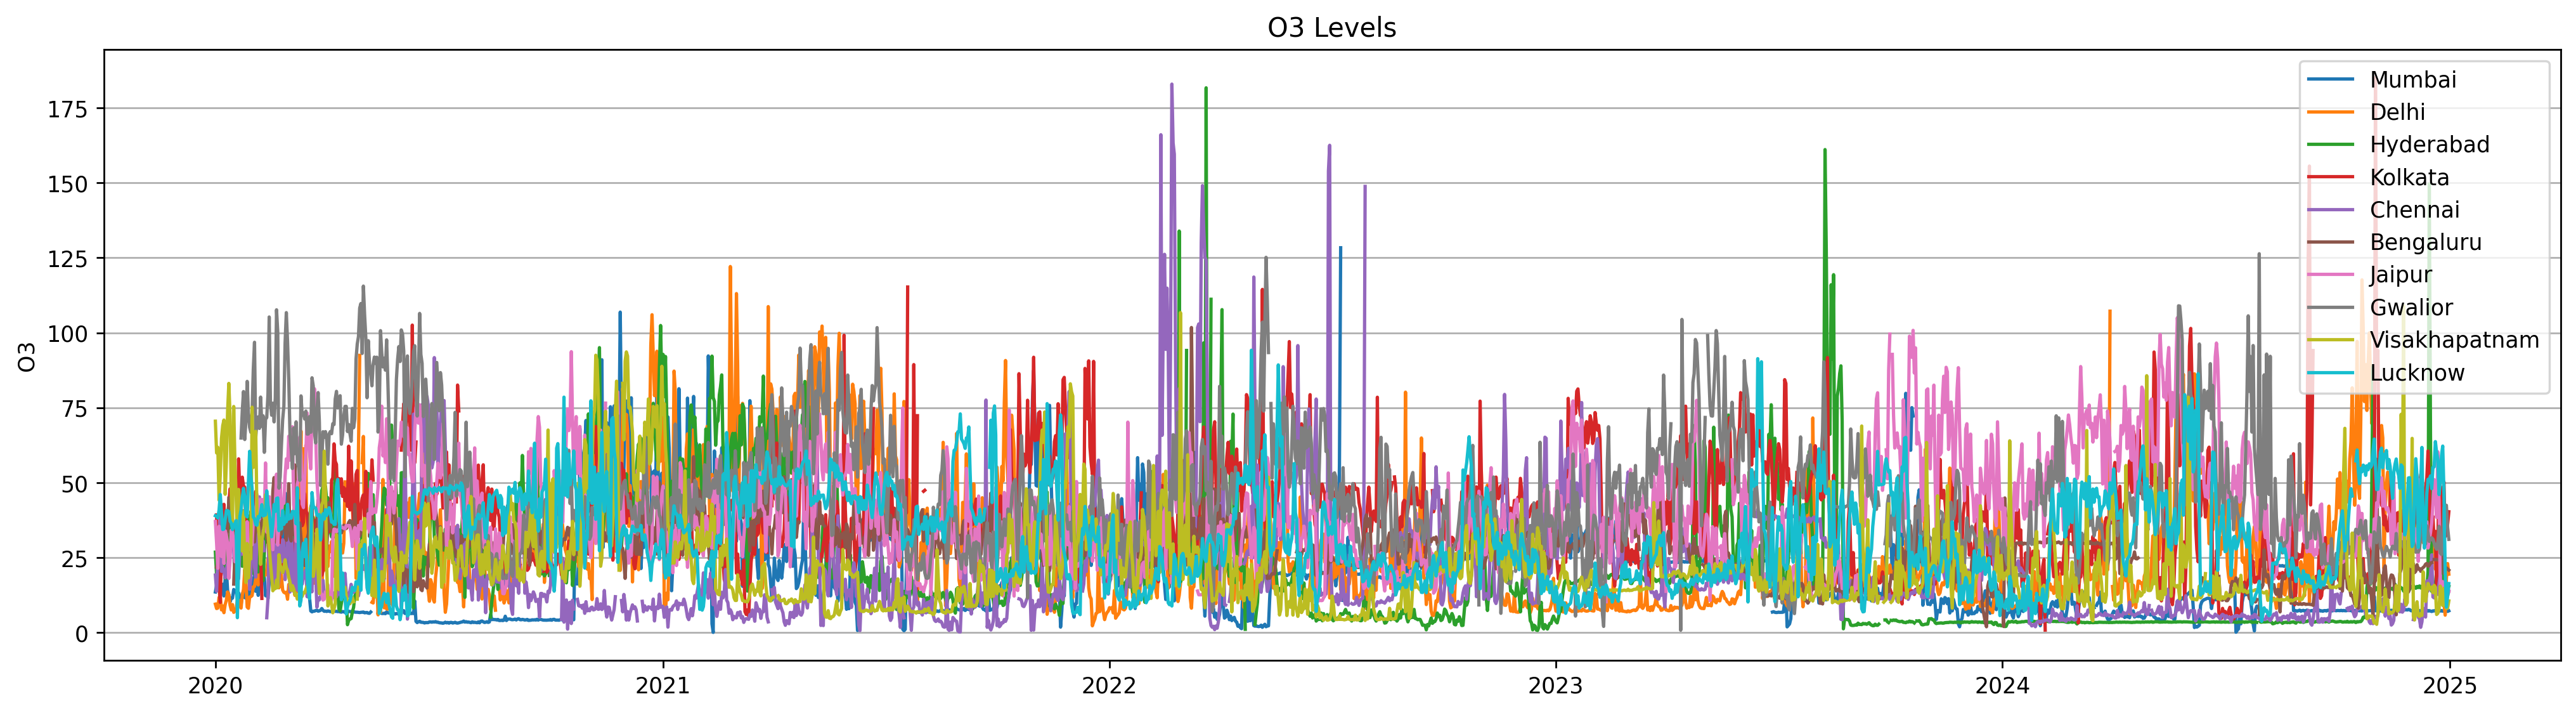

In [24]:
cities = {
    "Mumbai": mumbai_df,
    "Delhi": delhi_df,
    "Hyderabad": hyderabad_df,
    "Kolkata": kolkata_df,
    "Chennai": chennai_df,
    "Bengaluru": bengaluru_df,
    "Jaipur": jaipur_df,
    "Gwalior": gwalior_df,
    "Visakhapatnam": visakhapatnam_df,
    "Lucknow": lucknow_df
}

parameters = parameters

# Plot for each parameter
for param in parameters:
    plt.figure(figsize=(20, 5), dpi=250)
    for city, df in cities.items():
        plt.plot(df['Timestamp'], df[param], label=city)
    plt.ylabel(param)
    plt.legend()
    plt.title(f"{param} Levels")
    plt.grid(axis='y')
    plt.show()

In [25]:
def show_time_series_data(df, **params):
    for i in df.columns[2:-5]:
        plt.figure(figsize=(20,6))
        plt.plot(df['Timestamp'], df[i], **params)
        plt.ylabel(f'{i}')
        plt.grid(axis='y')
        plt.title(f'{i} Distribution')

In [26]:
def show_param_distribution(df, **params):
    for i in df.columns[2:-5]:
        plt.figure(figsize=(12,5))
        sns.histplot(df[i], kde=True, **params)
        plt.grid(axis='y')
        plt.title(f'{i} Distribution')


In [27]:
def replace_with_centered_rolling_mean(df, window=5):
    for col in df.columns[2:-5]:  
        rolling_mean = df[col].rolling(window=window, min_periods=1, center=True).mean()
        df[col].fillna(rolling_mean, inplace=True)  # Replace NaN values
        df.loc[df[col] == 0, col] = rolling_mean  # Replace zero values

In [28]:
bengaluru_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  1827 non-null   datetime64[ns]
 1   Location   1827 non-null   object        
 2   PM2.5      1754 non-null   float64       
 3   PM10       1753 non-null   float64       
 4   NO2        1714 non-null   float64       
 5   NH3        1715 non-null   float64       
 6   SO2        1675 non-null   float64       
 7   CO         1753 non-null   float64       
 8   O3         1691 non-null   float64       
 9   Year       1827 non-null   int32         
 10  Month      1827 non-null   int32         
 11  Day        1827 non-null   int32         
 12  Weekday    1827 non-null   int32         
 13  Weekend    1827 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int32(4), int64(1), object(1)
memory usage: 171.4+ KB


In [29]:
bengaluru_df.describe()

Timestamp        PM2.5         PM10          NO2  \
count                           1827  1754.000000  1753.000000  1714.000000   
mean   2022-07-02 00:00:00.000000256    31.978198    85.249743    24.395776   
min              2020-01-01 00:00:00     4.570000     8.000000     0.990000   
25%              2021-04-01 12:00:00    16.742500    58.150000    15.642500   
50%              2022-07-02 00:00:00    27.530000    81.260000    20.845000   
75%              2023-10-01 12:00:00    42.432500   106.790000    31.377500   
max              2024-12-31 00:00:00   794.000000   283.050000   113.540000   
std                              NaN    32.073138    36.516430    12.940510   

               NH3          SO2           CO           O3         Year  \
count  1715.000000  1675.000000  1753.000000  1691.000000  1827.000000   
mean     12.836140     5.508054     0.709047    27.743187  2022.000000   
min       0.610000     1.040000     0.070000     1.950000  2020.000000   
25%       6.205000     4.285000     0.460000    22.220000  2021.000000   
50%      10.900000     5.570000     0.650000    28.880000  2022.000000   
75%      17.375000     6.260000     0.880000    33.350000  2023.000000   
max      83.870000    21.260000     2.590000   101.760000  2024.000000   
std       9.790109     2.196749     0.335602     8.996069     1.415375   

             Month          Day      Weekday      Weekend  
count  1827.000000  1827.000000  1827.000000  1827.000000  
mean      6.521073    15.735085     3.000000     0.285714  
min       1.000000     1.000000     0.000000     0.000000  
25%       4.000000     8.000000     1.000000     0.000000  
50%       7.000000    16.000000     3.000000     0.000000  
75%      10.000000    23.000000     5.000000     1.000000  
max      12.000000    31.000000     6.000000     1.000000  
std       3.450157     8.804801     2.000548     0.451878

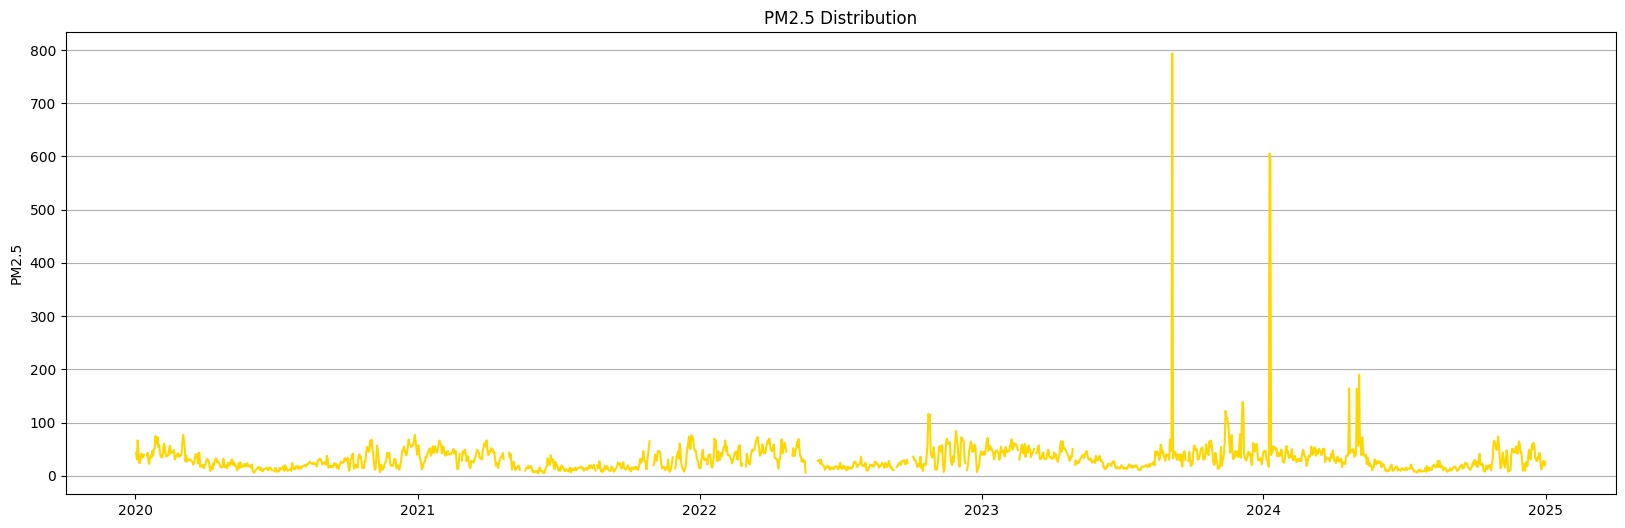

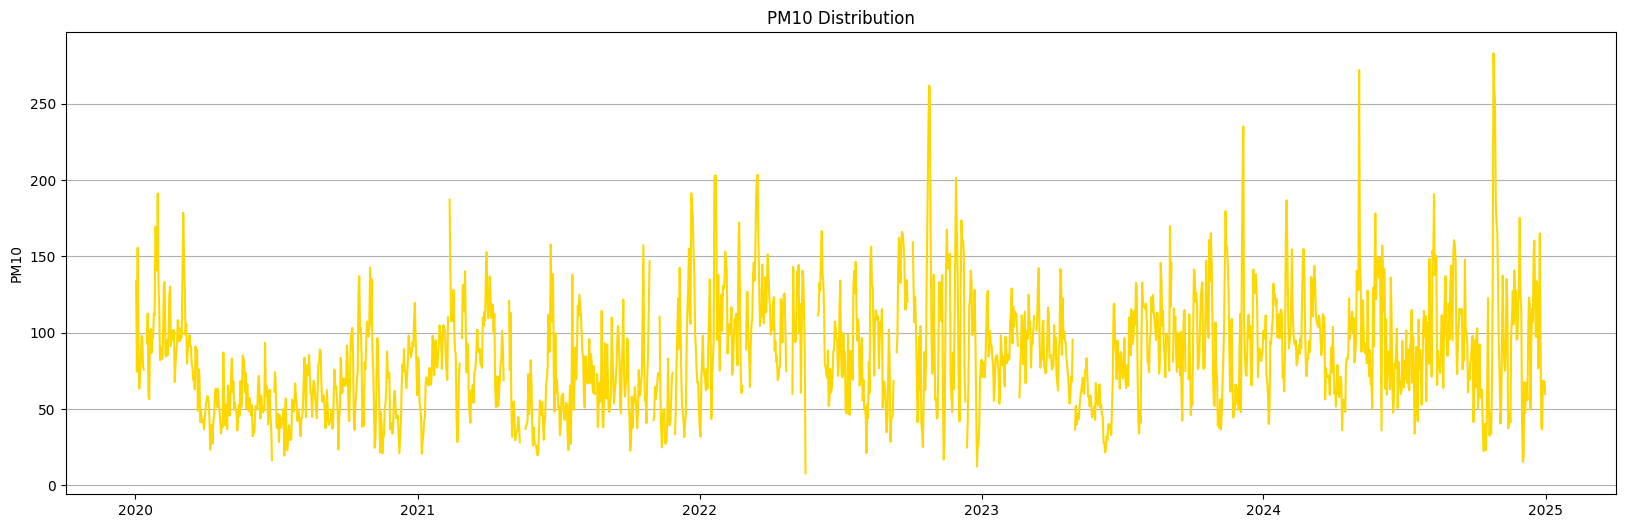

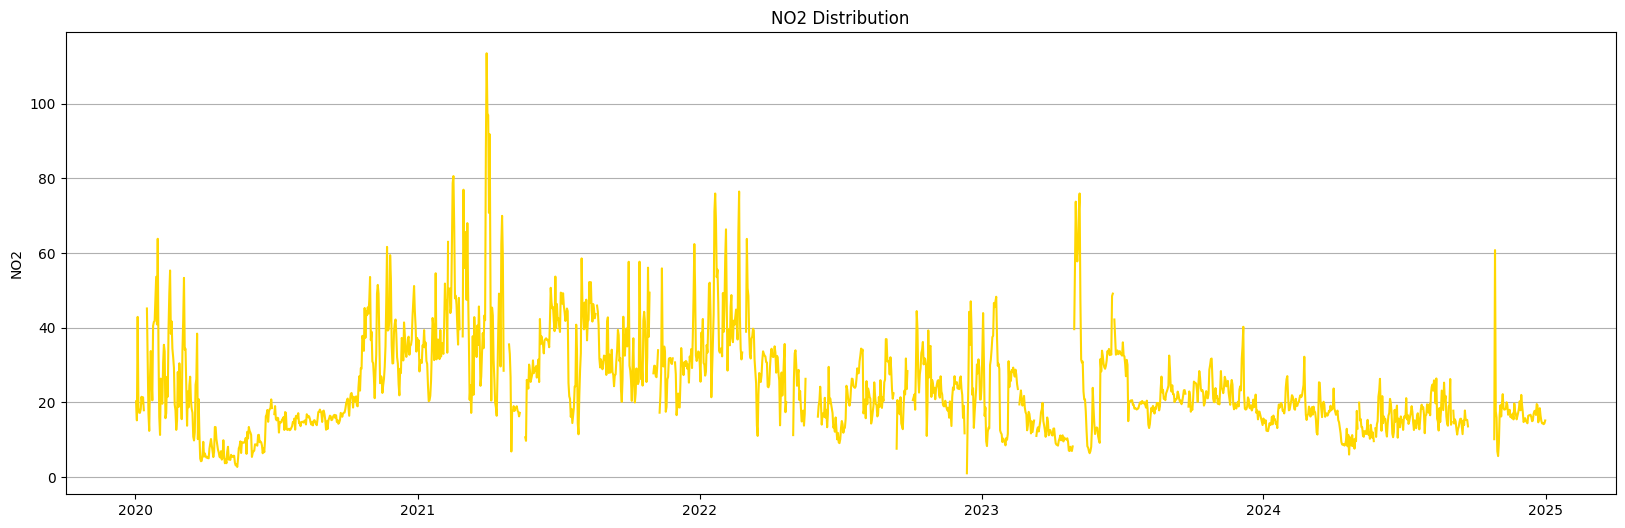

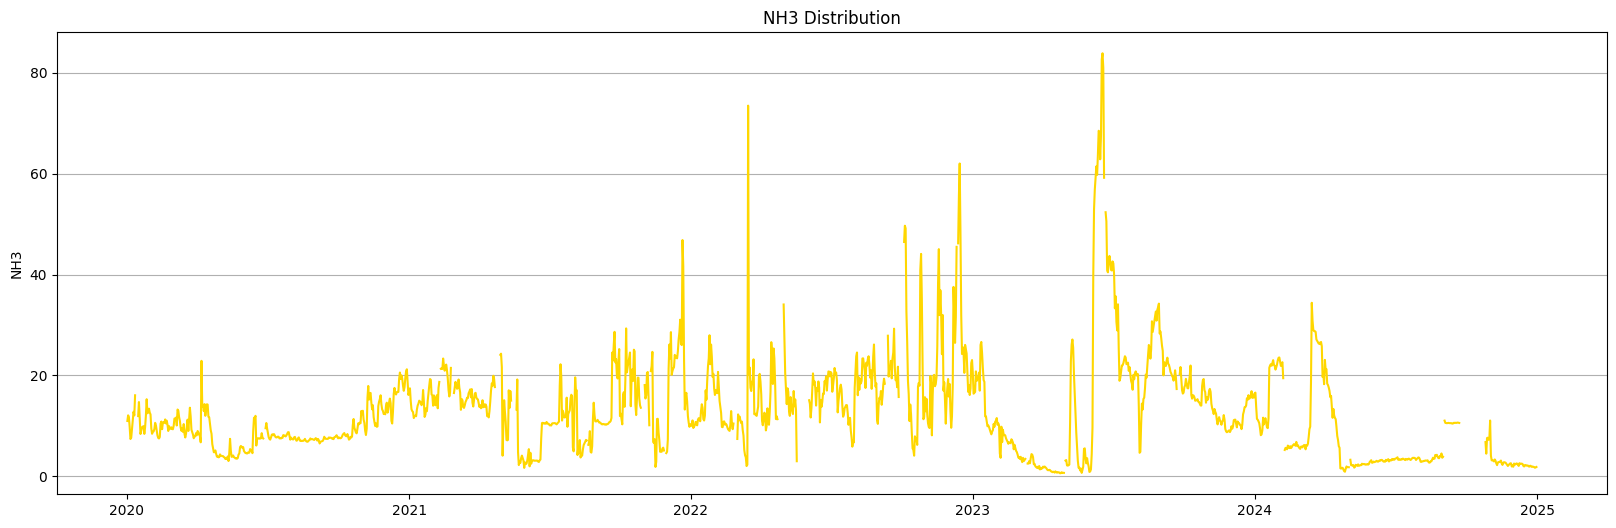

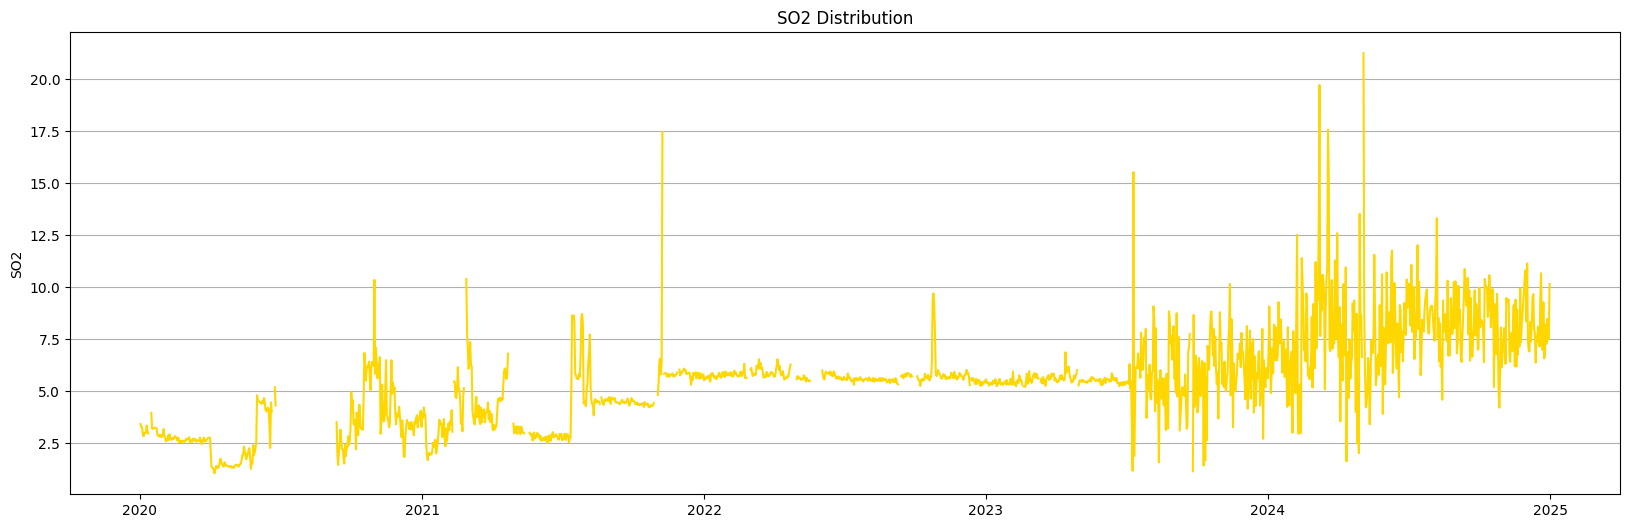

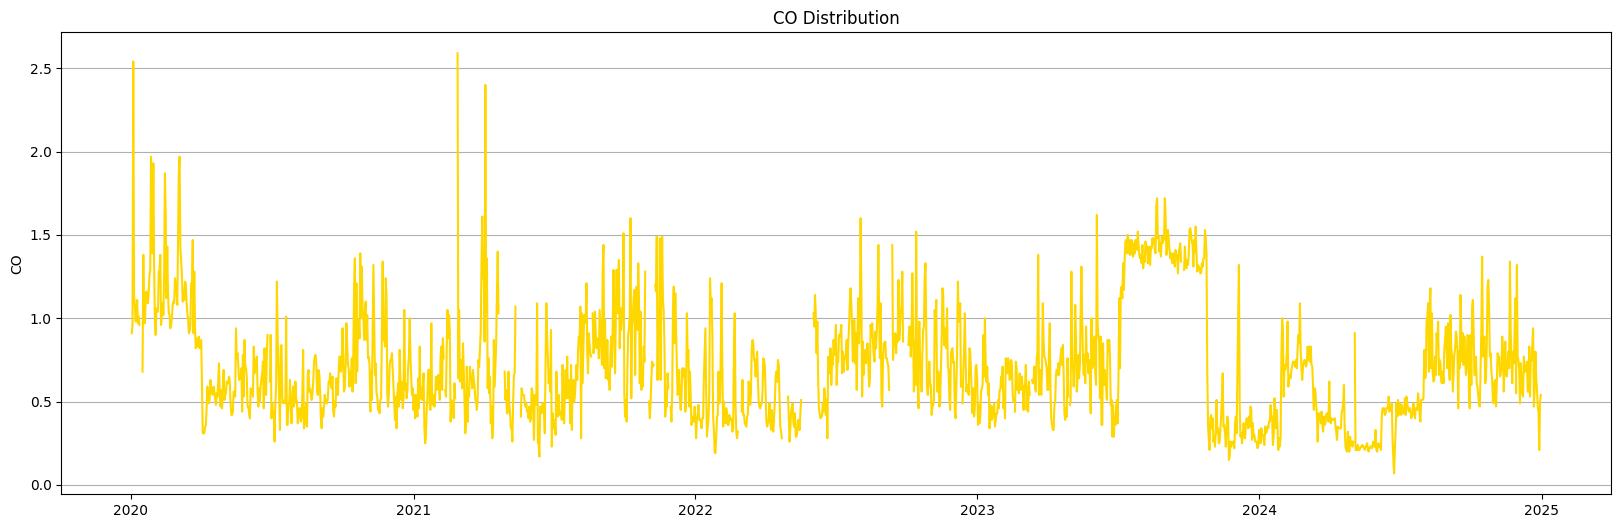

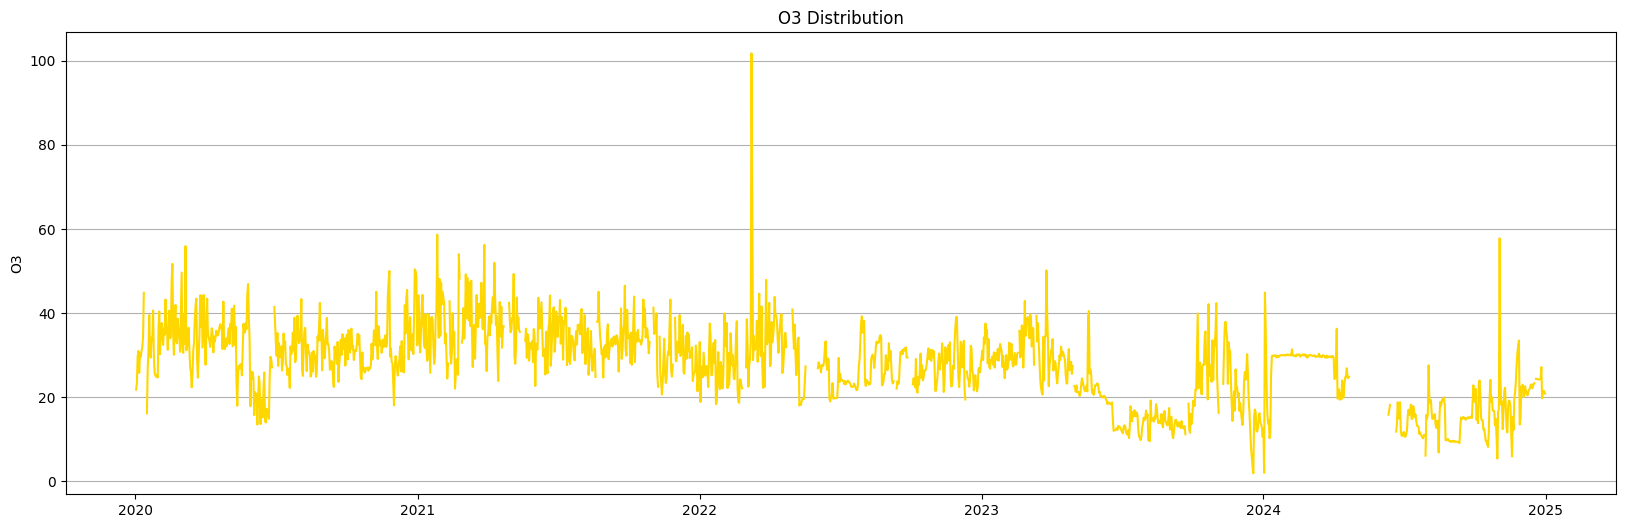

In [30]:
show_time_series_data(bengaluru_df, color='gold')

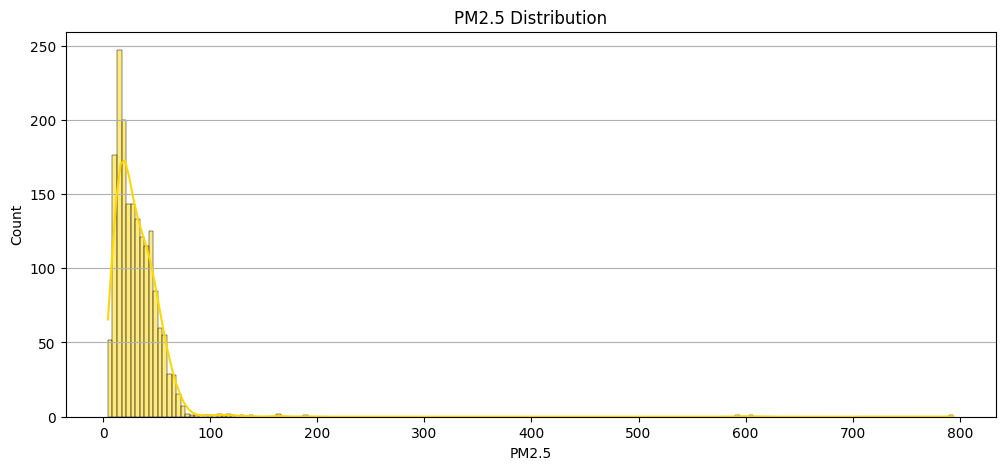

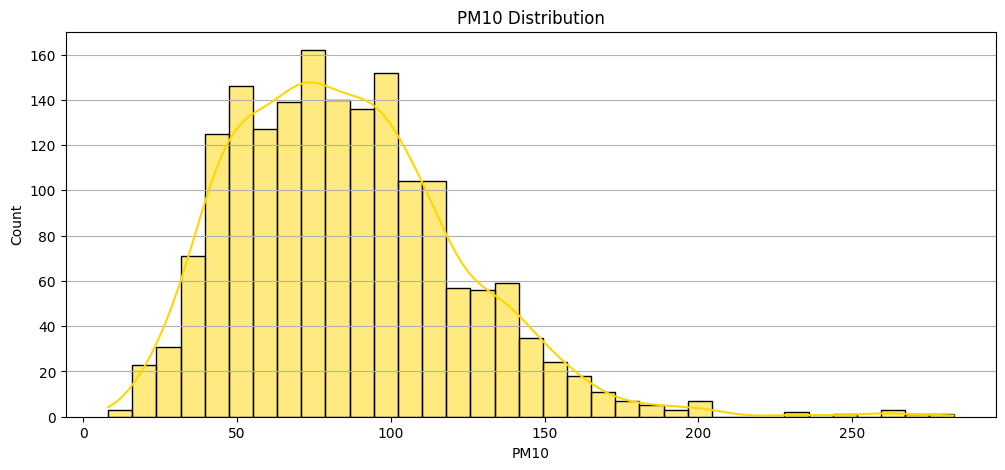

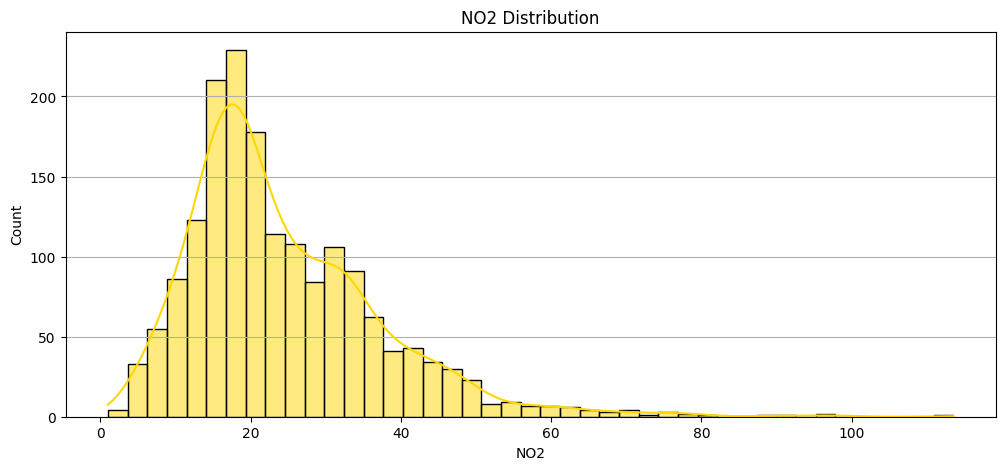

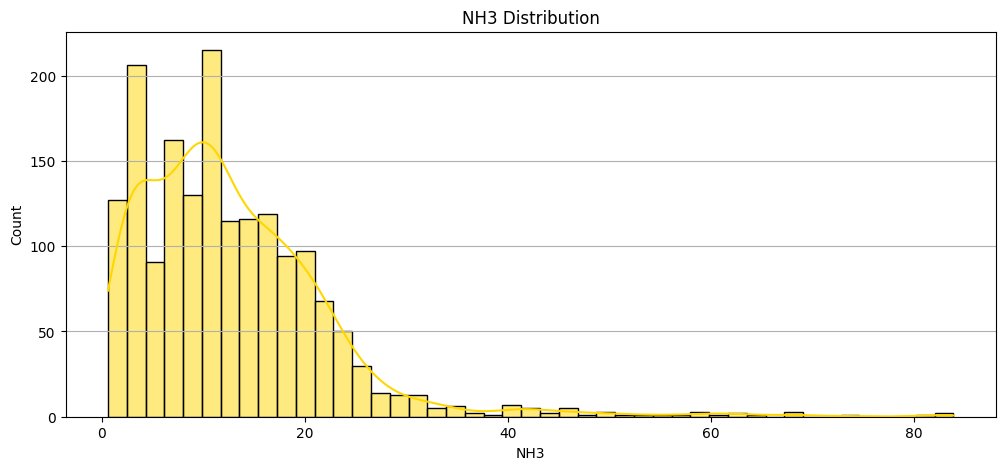

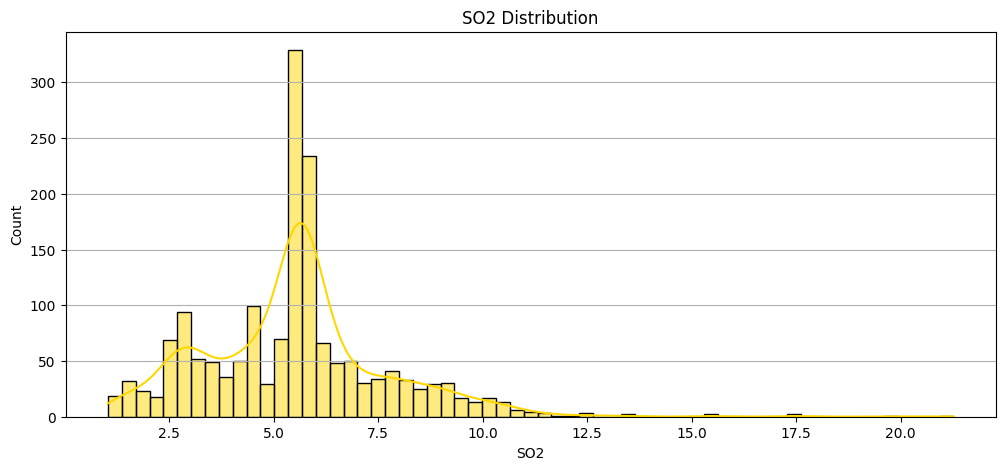

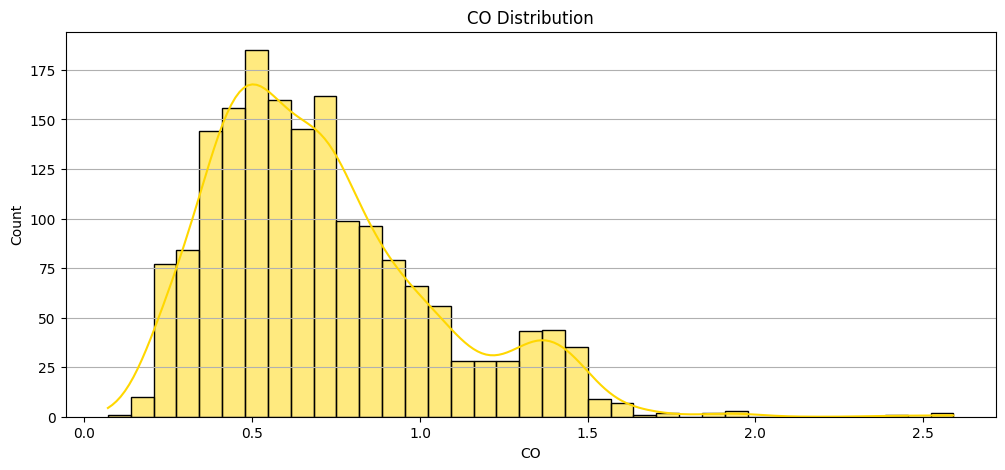

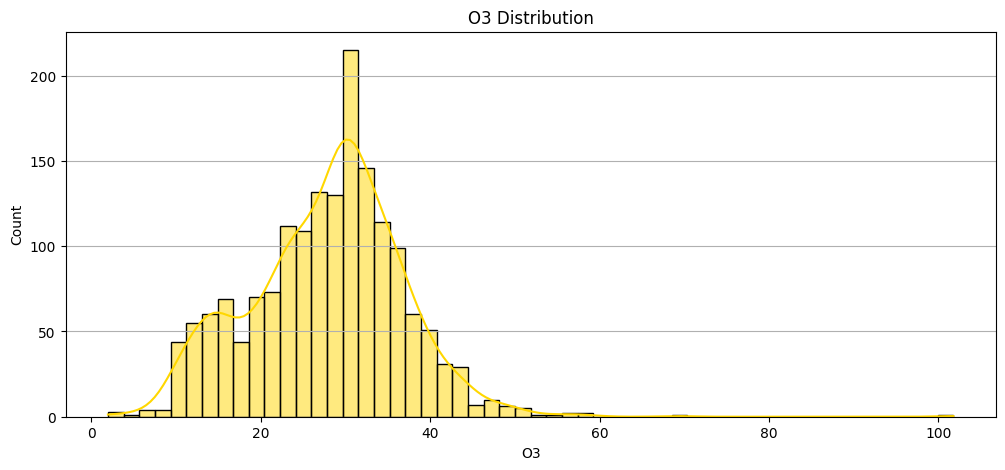

In [31]:
show_param_distribution(bengaluru_df, color='gold')

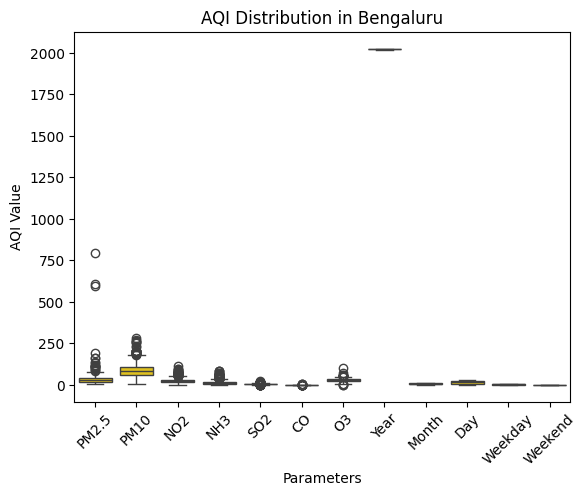

In [35]:

sns.boxplot(data=bengaluru_df, color='gold')

plt.title("AQI Distribution in Bengaluru")
plt.xlabel("Parameters")
plt.ylabel("AQI Value")
plt.xticks(rotation=45)  
plt.show()

In [38]:
combined_df = pd.concat([bengaluru_df, chennai_df, delhi_df, hyderabad_df, kolkata_df, mumbai_df, gwalior_df, jaipur_df, lucknow_df, visakhapatnam_df], axis=0, ignore_index=True)


In [39]:
combined_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  18270 non-null  datetime64[ns]
 1   Location   18270 non-null  object        
 2   PM2.5      17866 non-null  float64       
 3   PM10       17294 non-null  float64       
 4   NO2        17836 non-null  float64       
 5   NH3        17159 non-null  float64       
 6   SO2        17788 non-null  float64       
 7   CO         17891 non-null  float64       
 8   O3         17800 non-null  float64       
 9   Year       18270 non-null  int32         
 10  Month      18270 non-null  int32         
 11  Day        18270 non-null  int32         
 12  Weekday    18270 non-null  int32         
 13  Weekend    18270 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int32(4), int64(1), object(1)
memory usage: 1.7+ MB


In [40]:
combined_df.describe()

Timestamp         PM2.5          PM10           NO2  \
count                18270  17866.000000  17294.000000  17836.000000   
mean   2022-07-02 00:00:00     55.888837    123.289071     31.339990   
min    2020-01-01 00:00:00      1.280000      1.970000      0.020000   
25%    2021-04-01 00:00:00     23.180000     62.272500     16.090000   
50%    2022-07-02 00:00:00     40.760000    102.125000     27.020000   
75%    2023-10-02 00:00:00     69.350000    160.480000     41.660000   
max    2024-12-31 00:00:00    794.000000    999.990000    384.410000   
std                    NaN     52.249187     84.477314     20.931313   

                NH3           SO2            CO           O3          Year  \
count  17159.000000  17788.000000  17891.000000  17800.00000  18270.000000   
mean      25.515288     11.879519      0.917765     29.82539   2022.000000   
min        0.040000      0.010000      0.000000      0.07000   2020.000000   
25%       11.440000      5.720000      0.490000     14.94000   2021.000000   
50%       17.920000      9.640000      0.760000     26.90000   2022.000000   
75%       30.425000     15.480000      1.170000     39.94000   2023.000000   
max      297.830000    161.200000      7.820000    185.19000   2024.000000   
std       23.636385      9.216859      0.625908     19.65390      1.415026   

              Month           Day       Weekday       Weekend  
count  18270.000000  18270.000000  18270.000000  18270.000000  
mean       6.521073     15.735085      3.000000      0.285714  
min        1.000000      1.000000      0.000000      0.000000  
25%        4.000000      8.000000      1.000000      0.000000  
50%        7.000000     16.000000      3.000000      0.000000  
75%       10.000000     23.000000      5.000000      1.000000  
max       12.000000     31.000000      6.000000      1.000000  
std        3.449307      8.802632      2.000055      0.451766

In [42]:
combined_df['Location'].value_counts().sort_values(ascending=False)

Location
Bengaluru - Silk Board                             1827
Chennai - Alandur Bus Depot                        1827
Delhi - Punjabi Bagh                               1827
Hyderabad - Central University                     1827
Kolkata - Rabindra Bharati University              1827
Mumbai - Chhatrapati Shivaji Intl. Airport (T2)    1827
Gwalior - City Center                              1827
Jaipur - Police Commissionerate                    1827
Lucknow - Lalbagh                                  1827
Visakhapatnam - GVM Corporation                    1827
Name: count, dtype: int64

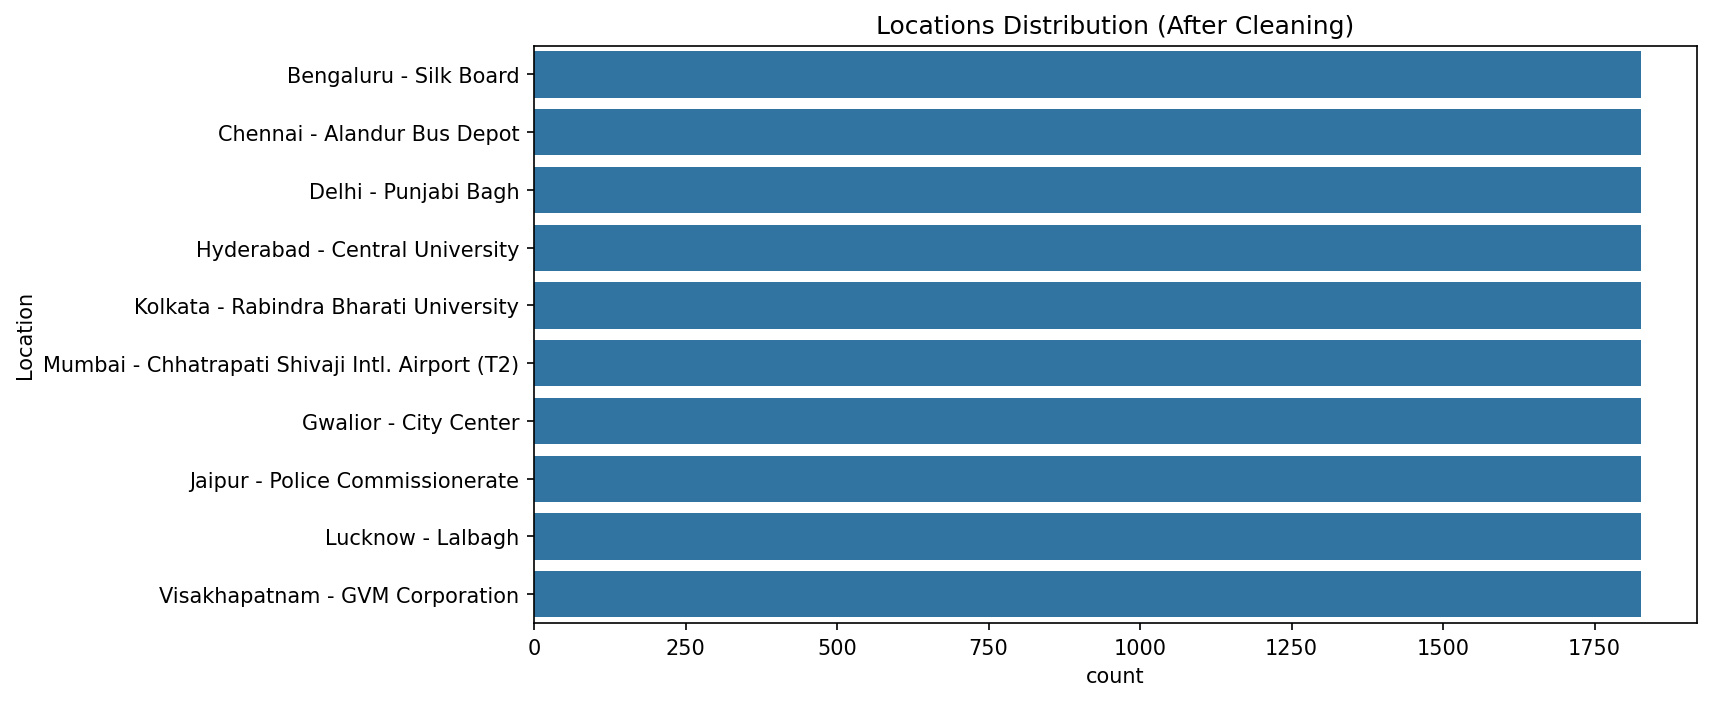

In [43]:
plt.figure(figsize=(10,5), dpi=150)

sns.barplot(x=combined_df['Location'].value_counts().values, y=combined_df['Location'].value_counts().index)
plt.xlabel('count')
plt.title('Locations Distribution (After Cleaning)')
plt.show()

In [44]:
combined_df2 = combined_df.copy()
combined_df2['Location'] = combined_df['Location'].map({'Bengaluru - Silk Board':1, 'Chennai - Alandur Bus Depot':2,
                                           'Delhi - Punjabi Bagh':3, 'Hyderabad - Central University':4,
                                           'Kolkata - Rabindra Bharati University':5, 'Mumbai - Chhatrapati Shivaji Intl. Airport (T2)':6,
                                            'Gwalior - City Center':7, 'Jaipur - Police Commissionerate':8,
                                            'Lucknow - Lalbagh':9, 'Visakhapatnam - GVM Corporation':10})

In [45]:
numeric_df = combined_df2.select_dtypes(include=np.number)

corr = round(numeric_df.corr(),2)
# corr

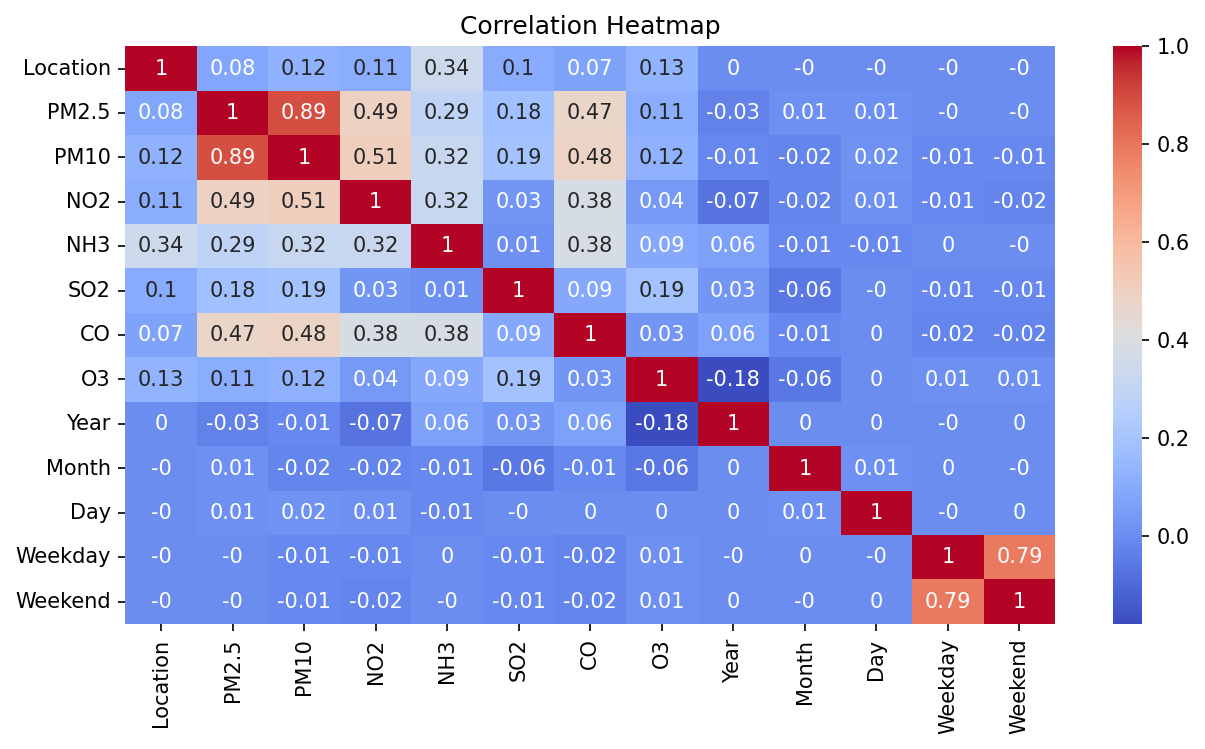

In [46]:
plt.figure(figsize=(10,5), dpi=150)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()